<a href="https://colab.research.google.com/github/Gonzales-James/Numerical_Methods/blob/main/Numerical_Integration/58015_Go_Numerical_Integration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Numerical Integration**

*Submitted by: Go Group* <br>
*Submitted to: Engr. Dylan Josh Lopez*<br>
*Section: 58015*

## **Importing needed Libraries**

In [1]:
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt
from numpy.random import normal

## **Declaration of Functions to be used**

In [2]:
a, b = 0, 5
n = 1e4

f1 = lambda x: (x**2+2)*(x+5)
f2 = lambda x: 2*x**4 + 3*x**3 - 11*x**2 - 9*x + 15
f3 = lambda x: (x**2 + 2*x)/(2*x**3) 


p1 = lambda x: x**4 + 3*x**2 + 4
p2 = lambda x: 2*x**5 + 6*x**4 + 3*x**2 + 13 

t1 = lambda x: np.sin(2*x) + np.cos(5*x)
t2 = lambda x: (np.cos(x**2) + np.sin(x)) / (5)

l1 = lambda x: np.log(x**2+1)
l2 = lambda x: np.log(5)**(2*x+1)

## **Integration using SciPy**

Scipy has different techiques to integrate but “quad” is the one that is mainly used. “quad” means QUADPACK is a FORTRAN 77 library. The  “scipy.integrate.quad” automatically integrates the one-dimensional function from two end points(a & b).

In [3]:
integrate.quad(f1, a, b)

(439.58333333333326, 4.880355379081417e-12)

In [4]:
integrate.quad(f2, a, b)

(1222.9166666666667, 1.3609620133607769e-11)

In [5]:
integrate.quad(f3, a, b)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  """Entry point for launching an IPython kernel.


(9.548065066337585, 2.079440340399742)

## **Simpson's 1/3 Rule**

The function simp_13 aims to simulate the function used to calculate the area under a curve with definite integrals. The Simpson 1/3 rule is fairly simple and easy to understand when placed in the following Python code.<br><br>

Firstly, the function takes in 4 arguments which are: func, lb, ub, and divs in order. The func argument takes in the function, the lb and ub take the lower boundary and the upper boundary limits, respectively, while the divs are the counts of how many steps are taken when dividing looking for the solution.<br><br>

Afterward, the function runs and uses the values placed for each argument and applies the formula for the Simpson 1/3 rule. First, it computes for a variable h which is calculated by subtracting the lower to the upper boundary, which is then divided by the count of division performed. <br><br>

Next for the "A" variable is the main process. It adds the function for both the upp and lower boundaries and the summation of function, which loops repeatedly depending on the divs argument's value. For the odd ranges, the summation is multiplied to 4, while for the even ranges, it is only multiplied by 2. Once everything has been calculated, the values are added together to give the variable "A" its value. <br><br>

Lastly is for the solution displayed as the variable "S," which is what the whole function will return. Here it is completely straightforward where "h" is divided by 3 then multiplied to the variable "A" to get the return value of the whole function.

In [6]:
def simp_13(func,lb,ub,divs):
  h = (ub-lb)/divs
  A = (func(lb)+func(ub))+ \
            np.sum(4*func(lb+h*np.arange(1,divs,2)))+ \
            np.sum(2*func(lb+h*np.arange(2,divs,2)))
  S = (h/3)*A
  return S

## **Simpson's 3/8 Rule**

This technique is very similar to Simpson’s 1/3 rule since they both have the same parameters. It works by using cubic interpolation. And these are the steps the function will take: <br><br>

Firstly, the function takes in 4 arguments which are: func, lb, ub, and divs in order. The func argument takes in the function, the lb and ub take the lower boundary and the upper boundary limits, respectively, while the divs are the counts of how many steps are taken when dividing looking for the solution.<br><br>

Afterward, the difference between the two endpoints will be divided by the count of divisions performed. It is recommended to have a higher divisor be more accurate and reduce the amount of error.<br><br>

In this method, the first step is dividing the difference of the two endpoints to the divisor. The main formula was coded, which include summations. The first summation will be multiplied by 3, and it will start with 1 until the value of “divs” given by the user, and the 3 will be the interval between every integer. All the summations in the 3/8 Simpson rule’s formula will have an interval of 3. The second summation is still multiplied by 3, but it will start with 2. The last summation is only multiplied by 2, but it will begin with 3.

In [7]:
def simp_38(func,lb,ub,divs):
  h = (ub-lb)/divs
  A = (func(lb)+func(ub))+ \
            np.sum(3*(func(lb+h*np.arange(1,divs,3))))+ \
            np.sum(3*(func(lb+h*np.arange(2,divs,3))))+ \
            np.sum(2*func(lb+h*np.arange(3,divs,3)))
  S = (3*h/8)*A
  return S

## **Monte Carlo Integration**

The function of Monte Carlo is to solve a problem using randomness. It is mostly used when other methods don’t work, meaning it can fix difficult problems. It’s not only used in numerical integration but also in optimization and probability distribution. This technique will show distributions of the probable result values. 



The function below shows the upper boundary, lower boundary and divisor will have a random value spread in a uniform distribution.
The values of sample will then be inserted into the chosen function and get the average of the result. The last step is taking the mean of the difference of upper and lower boundary.


In [8]:
def monte_carlo(func,lb,ub,divs):
  samples = np.random.uniform(lb,ub,int(divs))
  mean = np.mean(func(samples))
  S = (ub-lb)*mean
  return S

## **Implementing Different Integration Techniques using Higher-Order Polynomials**

In [9]:
res1 = integrate.quad(p1, a, b)
res2 = integrate.quad(p2, a, b)
error1 = abs(770 - res1[0])
error2 = abs(9148.3333 - res2[1])

print(f'Answer (Function 1): {res1[0]}, Error Approximation: {error1}')
print(f'Answer (Function 2): {res2[0]}, Error Approximation: {error2}')

Answer (Function 1): 770.0, Error Approximation: 0.0
Answer (Function 2): 9148.333333333334, Error Approximation: 9148.333299999898


In [10]:
res1 = simp_13(p1,a,b,n)
res2 = simp_13(p2,a,b,n)
error1 = abs(770 - res1)
error2 = abs(9148.3333 - res2)

print(f'Answer (Function 1): {res1}, Error Approximation: {error1}')
print(f'Answer (Function 2): {res2}, Error Approximation: {error2}')

Answer (Function 1): 770.0000000000001, Error Approximation: 1.1368683772161603e-13
Answer (Function 2): 9148.333333333336, Error Approximation: 3.333333552291151e-05


In [11]:
res1 = simp_38(p1,a,b,n)
res2 = simp_38(p2,a,b,n)
error1 = abs(770 - res1)
error2 = abs(9148.3333 - res2)

print(f'Answer (Function 1): {res1}, Error Approximation: {error1}')
print(f'Answer (Function 2): {res2}, Error Approximation: {error2}')

Answer (Function 1): 769.9120165632969, Error Approximation: 0.08798343670309805
Answer (Function 2): 9147.072623351056, Error Approximation: 1.2606766489443544


In [12]:
res1 = monte_carlo(p1,a,b,n)
res2 = monte_carlo(p2,a,b,n)
error1 = abs(770 - res1)
error2 = abs(9148.3333 - res2)

print(f'Answer (Function 1): {res1}, Error Approximation: {error1}')
print(f'Answer (Function 2): {res2}, Error Approximation: {error2}')

Answer (Function 1): 772.9443816327491, Error Approximation: 2.9443816327491277
Answer (Function 2): 9102.085372844267, Error Approximation: 46.24792715573312


## **Implementing Different Integration Techniques using Trigonometric Functions**

In [13]:
res1 = integrate.quad(t1, a, b)
res2 = integrate.quad(t2, a, b)
error1 = abs(0.8930654145186716 - res1[0])
error2 = abs(0.2655609161866473 - res2[1])

print(f'Answer (Function 1): {res1}, Error Approximation: {error1}')
print(f'Answer (Function 2): {res2}, Error Approximation: {error2}')

Answer (Function 1): (0.8930654145186718, 2.864765480392606e-09), Error Approximation: 2.220446049250313e-16
Answer (Function 2): (0.26556091618664734, 1.6347849224503108e-10), Error Approximation: 0.2655609160231688


In [14]:
res1 = simp_13(t1,a,b,n)
res2 = simp_13(t2,a,b,n)
error1 = abs(0.8930654145186716 - res1)
error2 = abs(0.2655609161866473 - res2)

print(f'Answer (Function 1): {res1}, Error Approximation: {error1}')
print(f'Answer (Function 2): {res2}, Error Approximation: {error2}')

Answer (Function 1): 0.8930654145186708, Error Approximation: 7.771561172376096e-16
Answer (Function 2): 0.26556091618663397, Error Approximation: 1.3322676295501878e-14


In [15]:
res1 = simp_38(t1,a,b,n)
res2 = simp_38(t2,a,b,n)
error1 = abs(0.8930654145186716 - res1)
error2 = abs(0.2655609161866473 - res2)

print(f'Answer (Function 1): {res1}, Error Approximation: {error1}')
print(f'Answer (Function 2): {res2}, Error Approximation: {error2}')

Answer (Function 1): 0.8930094849851871, Error Approximation: 5.5929533484544436e-05
Answer (Function 2): 0.2655601192171223, Error Approximation: 7.969695249854247e-07


In [16]:
res1 = monte_carlo(t1,a,b,n)
res2 = monte_carlo(t2,a,b,n)
error1 = abs(0.8930654145186716 - res1)
error2 = abs(0.2655609161866473 - res2)

print(f'Answer (Function 1): {res1}, Error Approximation: {error1}')
print(f'Answer (Function 2): {res2}, Error Approximation: {error2}')

Answer (Function 1): 0.7747267877610203, Error Approximation: 0.11833862675765128
Answer (Function 2): 0.2590303088786163, Error Approximation: 0.006530607308031011


## **Implementing Different Integration Techniques using Logarithmic Functions**

In [17]:
res1 = integrate.quad(l1, a, b)
res2 = integrate.quad(l2, a, b)
error1 = abs(9.037284223997442 - res1[0])
error2 = abs(195.4988274369592 - res2[1])

print(f'Answer (Function 1): {res1[0]}, Error Approximation: {error1}')
print(f'Answer (Function 2): {res2[0]}, Error Approximation: {error2}')

Answer (Function 1): 9.037284223997442, Error Approximation: 0.0
Answer (Function 2): 195.49882743695915, Error Approximation: 195.49882743695704


In [18]:
res1 = simp_13(l1,a,b,n)
res2 = simp_13(l2,a,b,n)
error1 = abs(9.037284223997442 - res1)
error2 = abs(195.4988274369592 - res2)

print(f'Answer (Function 1): {res1}, Error Approximation: {error1}')
print(f'Answer (Function 2): {res2}, Error Approximation: {error2}')

Answer (Function 1): 9.03728422399744, Error Approximation: 1.7763568394002505e-15
Answer (Function 2): 195.4988274369592, Error Approximation: 0.0


In [19]:
res1 = simp_38(l1,a,b,n)
res2 = simp_38(l2,a,b,n)
error1 = abs(9.037284223997442 - res1)
error2 = abs(195.4988274369592 - res2)

print(f'Answer (Function 1): {res1}, Error Approximation: {error1}')
print(f'Answer (Function 2): {res2}, Error Approximation: {error2}')

Answer (Function 1): 9.036876973949235, Error Approximation: 0.0004072500482070751
Answer (Function 2): 195.47537310012922, Error Approximation: 0.023454336829985323


In [20]:
res1 = monte_carlo(l1,a,b,n)
res2 = monte_carlo(l2,a,b,n)
error1 = abs(9.037284223997442 - res1)
error2 = abs(195.4988274369592 - res2)

print(f'Answer (Function 1): {res1}, Error Approximation: {error1}')
print(f'Answer (Function 2): {res2}, Error Approximation: {error2}')

Answer (Function 1): 8.96029491034746, Error Approximation: 0.07698931364998174
Answer (Function 2): 196.1790454339294, Error Approximation: 0.6802179969701854


## **Law of Big Numbers**

Law of big or large numbers is a theory wherein the results of the same experiment, repeated a large number of times, are being described. This theorem, when an experiment is repeated a large number of times, the average of the result must be close to the expected value. To summarize, the result of the experiments becomes more relative to the expected value when the trials are increased. 

[Reference](https://corporatefinanceinstitute.com/resources/knowledge/other/law-of-large-numbers/)

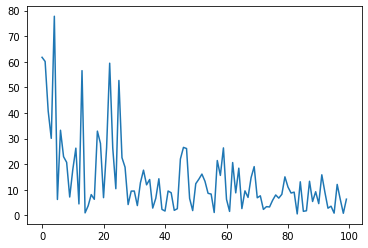

In [24]:
x_range = np.arange(100)
y_range = np.zeros(x_range.size)
sample_size = np.arange(100, 10100, 100)

for i in range(x_range.size):
  res1 = monte_carlo(p1,a,b,sample_size[i])
  error1 = abs(770 - res1)
  y_range[i] = error1

plt.plot(x_range, y_range)

The graph above is the visualization of the errors using the Monte Carlo function. The Monte Carlo function was iterated 100 times, and it can be seen in the graph that the error was decreasing when repeated often. It can be related to the law of big numbers wherein the more you repeated the experiment, the lower the errors, which means it will get closer to the expected value. 

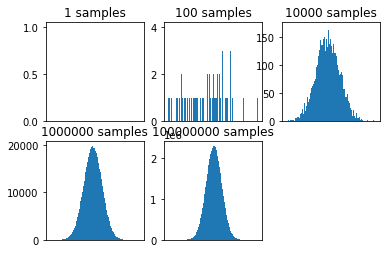

In [22]:
def montecarlo(mean, stdv):
  sizes= [1]
  x = 1
  for i in range(4):
    x = x*100
    sizes.append(x)

  for i in range(len(sizes)):
    sample = normal(mean, stdv, sizes[i])
    plt.subplot(len(sizes)/2, len(sizes)/2+1, i+1)
    plt.hist(sample, bins=200)
    plt.title('%d samples' % sizes[i])
    plt.xticks([])
  plt.show()

montecarlo(50, 5)

The two graphs shown above is about calculating the errors, the more samples are used, the lesser the error. This decreasing error can be observed regardless of sample size as the histogram remains reasonably consistent as the number of samples changes.

Next would be for the application of the law of big numbers; the size of the sample results in significant changes of the spread in the data shown on the histogram. For example, the first figure that only had 100 samples seem to show the data with an even spread; however, as the number of samples used increase by a factor of 100, the spread of the data approaches more and more towards expressing the standard Gaussian curve. This observation fits the law of big numbers, which states that as the size of the sample increases, the more the data is to balance in the middle of the whole sample

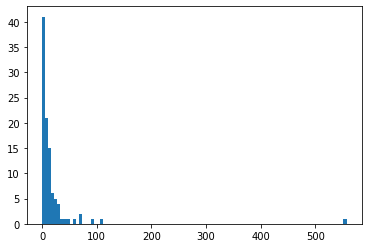

In [23]:
x_range = np.arange(101)
y_range = np.zeros(x_range.size)
bins = 10100
for i in range(1, x_range.size):
    res1 = simp_38(p1,a,b,i)
    error1 = abs(770 - res1)
    y_range[i] = error1
    bins-=100

plt.hist(y_range,bins)
%clear

The graph shown above is a visualization of the Simp 3/8 rule. The bin value is set to 10100 to make it factorable by 100 because the bin size will decrease every iteration same as the amount of error. It is related to the Law of Big Number because as the loop continue, the growth pace is diminishing.